In [63]:
# Plotting and numerical
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display

from yellowbrick.classifier import ConfusionMatrix
# Files
import os 
import pickle

# sklearn imports 
#from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

### Base Credit

n_estimator: o número de árvores de decisão - default = 100


In [3]:
with open('credit.pkl', 'rb') as file:
    X_treinamento_credit, y_treinamento_credit, X_teste_credit, Y_teste_credit = pickle.load(file)

In [45]:
NUM_ARVORES: int = 70

In [46]:
rnd_forest_credit = RandomForestClassifier(n_estimators=NUM_ARVORES, criterion='entropy', random_state=0)

In [47]:
rnd_forest_credit.fit(X_treinamento_credit, y_treinamento_credit)

RandomForestClassifier(criterion='entropy', n_estimators=70, random_state=0)

In [48]:
y_pred_credit = rnd_forest_credit.predict(X_teste_credit)

In [51]:
# Precisão
(sum(y_pred_credit == Y_teste_credit) / Y_teste_credit.size) * 100 

98.2

0.982

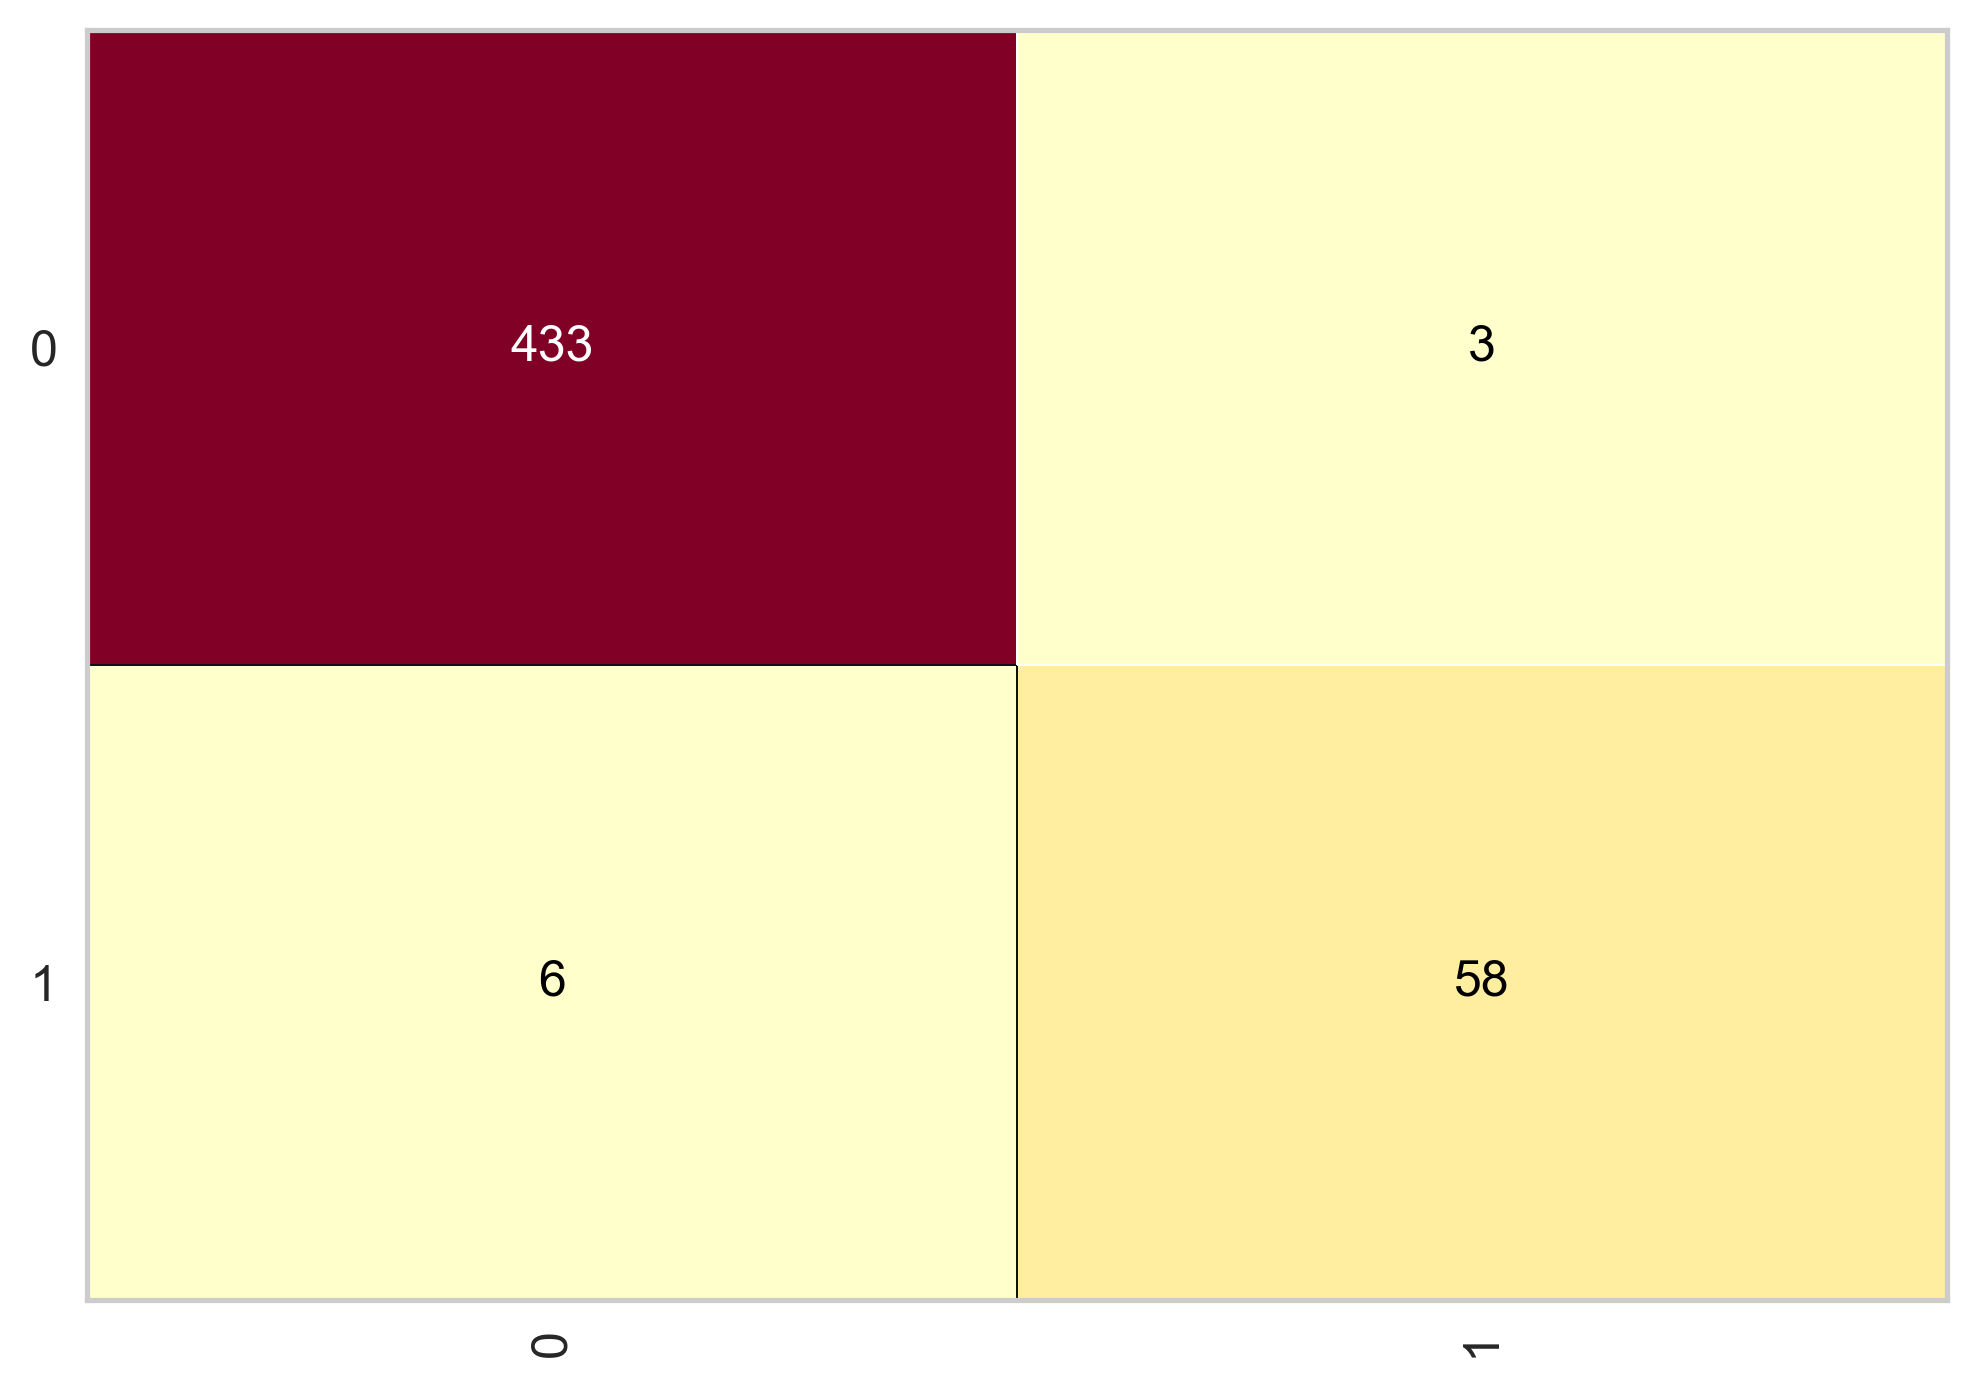

In [53]:
cm_credit = ConfusionMatrix(rnd_forest_credit)
cm_credit.fit(X_treinamento_credit, y_treinamento_credit)
cm_credit.score(X_teste_credit, Y_teste_credit)

### Base Census


In [57]:
with open('census.pkl', 'rb') as file:
    X_treinamento_census, y_treinamento_census, X_teste_census, Y_teste_census = pickle.load(file)

print(X_treinamento_census.shape, y_treinamento_census.shape)
print(X_teste_census.shape, Y_teste_census.shape)


(27676, 108) (27676,)
(4885, 108) (4885,)


In [72]:
rnd_forest_census = RandomForestClassifier(n_estimators=80, criterion='entropy', random_state=0)
rnd_forest_census.fit(X_treinamento_census, y_treinamento_census)

RandomForestClassifier(criterion='entropy', n_estimators=80, random_state=0)

In [73]:
y_pred_census = rnd_forest_census.predict(X_teste_census)

In [74]:
y_pred_census == Y_teste_census

array([ True,  True,  True, ...,  True,  True, False])

In [75]:
# A árvore de decisão simples, para essa base havia alcançado 81.04%
accuracy_score(Y_teste_census, y_pred_census)

0.8472876151484136

0.8472876151484136

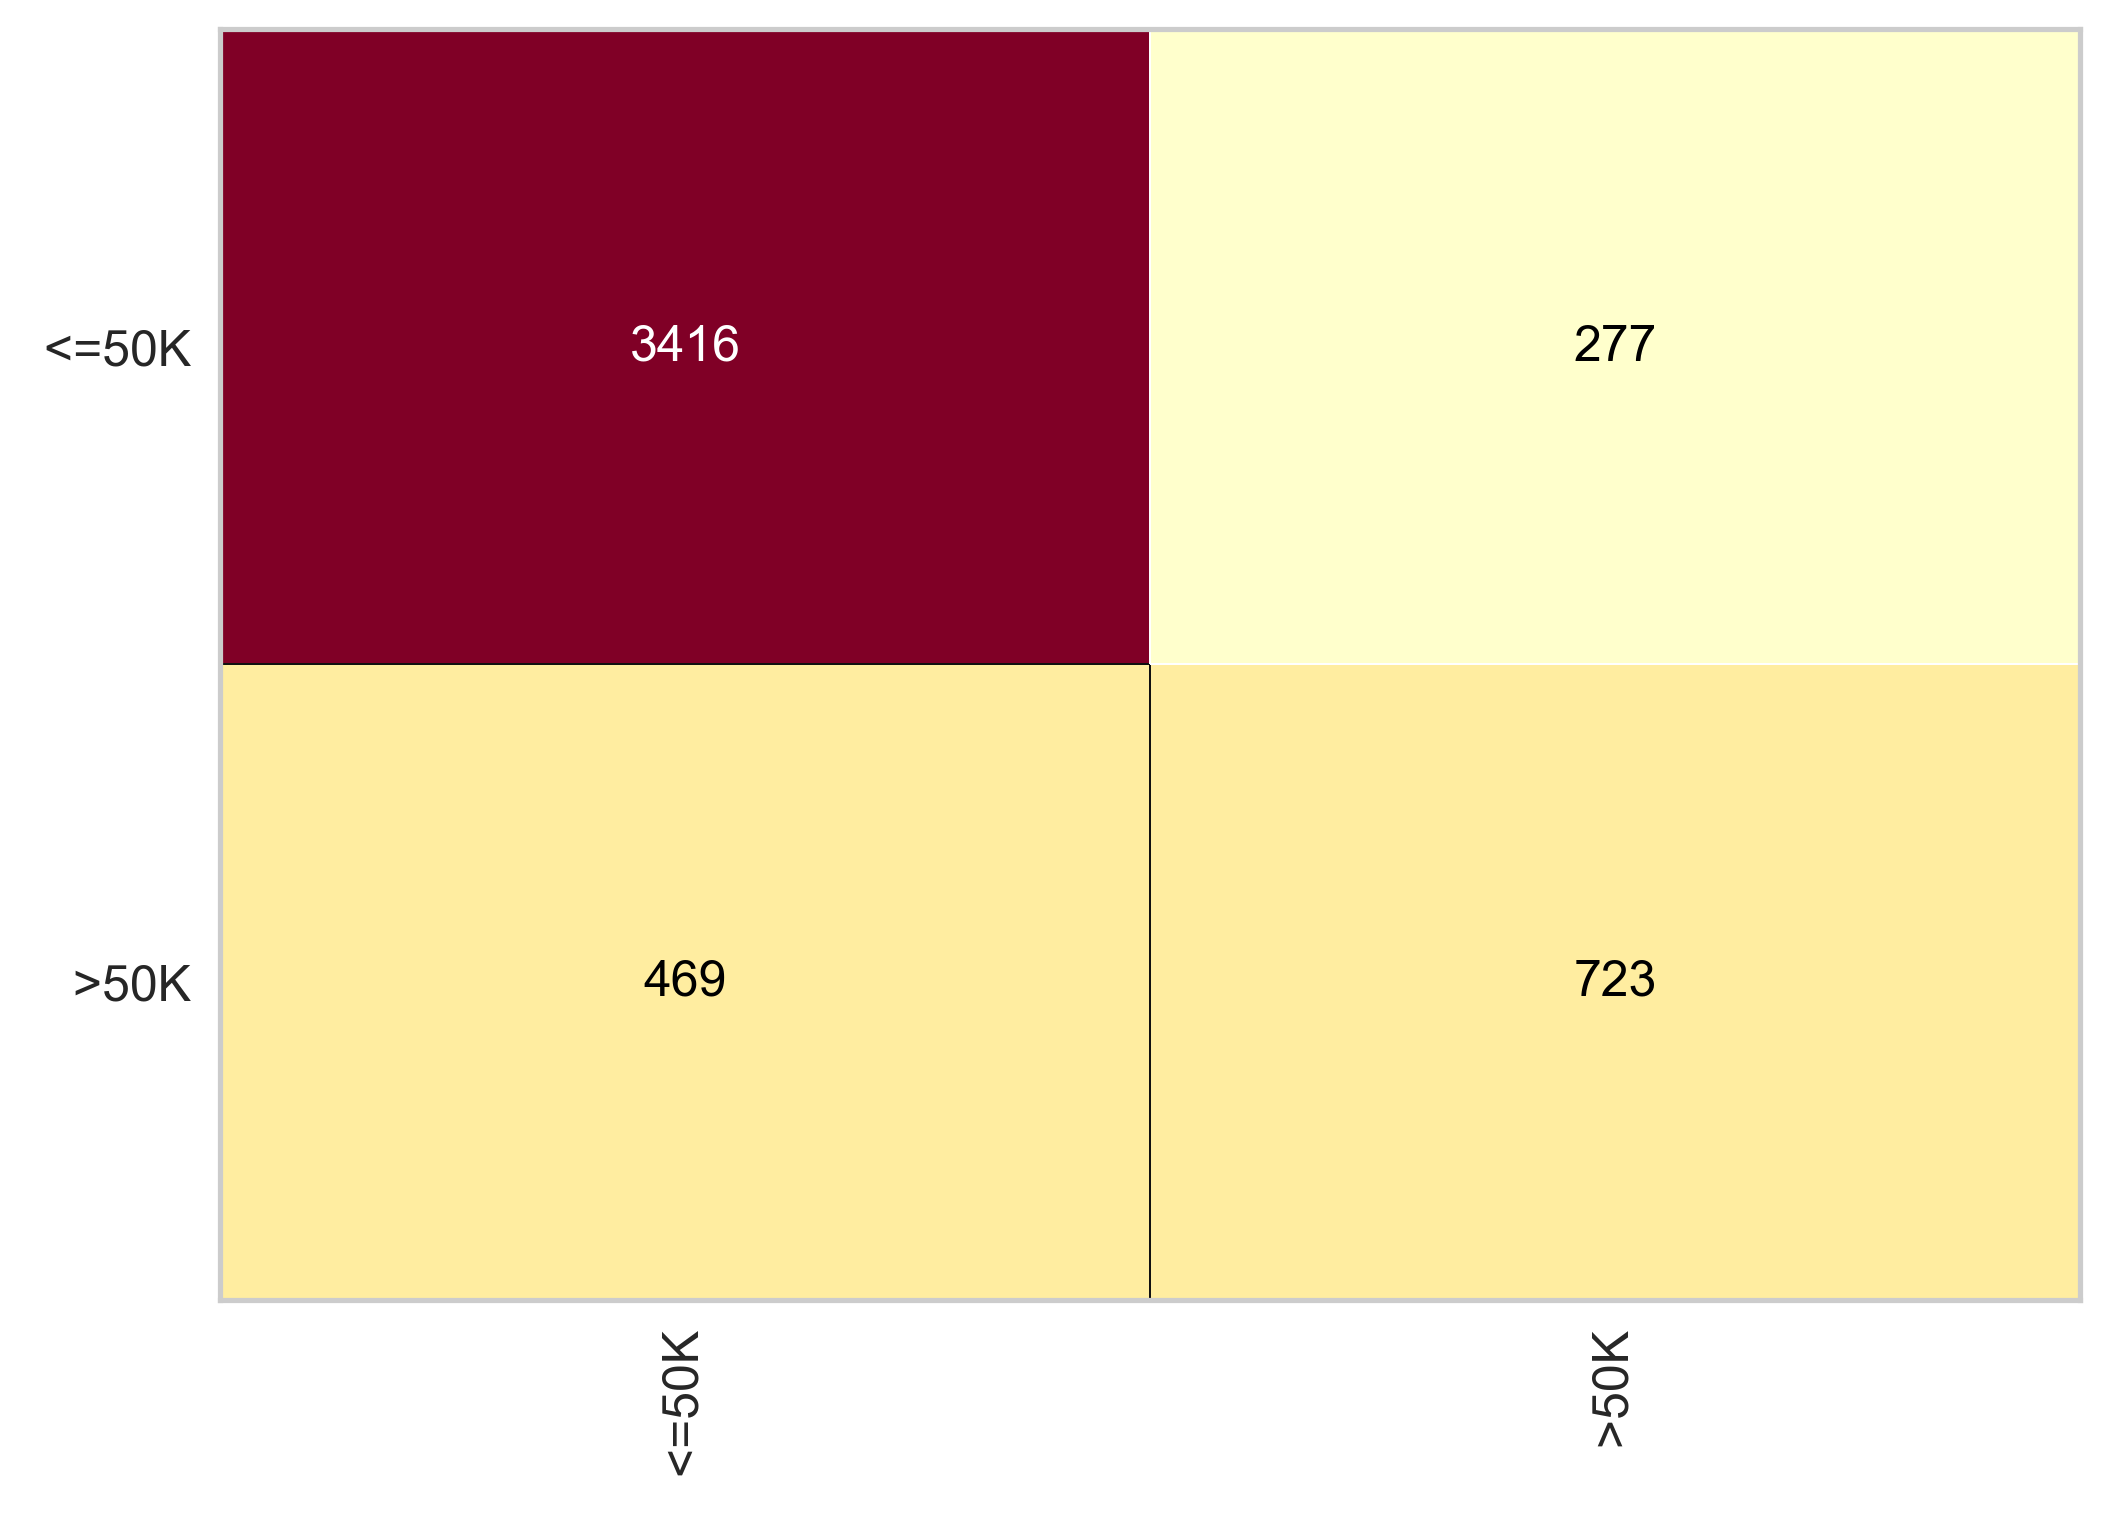

In [76]:
cm_census = ConfusionMatrix(rnd_forest_census)
cm_census.fit(X_treinamento_census, y_treinamento_census)
cm_census.score(X_teste_census, Y_teste_census)

In [78]:
print(classification_report(Y_teste_census, y_pred_census))

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      3693
        >50K       0.72      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885

